In [2]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from sklearn.linear_model import LogisticRegression
import os
from sklearn.neural_network import BernoulliRBM
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import *

In [3]:
# os.chdir("drive//MyDrive//Pulsar_root_dir")
##for google 

In [4]:
df = pd.read_excel("data/df_balanced_noDups.xlsx")

In [5]:
df.head()

,Unnamed: 0,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,47107,154.875000,48.590766,-0.285643,0.129281,4.153010,21.971915,6.746838,52.230021,0
1,47640,82.953125,49.541312,NaN,2.415202,127.269231,78.277555,-0.168708,-1.007810,1
2,8980,136.546875,49.711332,-0.104216,-0.354067,6.494983,29.245858,5.637335,33.822393,0
3,359,65.226562,35.696904,2.291891,10.118479,15.515050,48.872426,3.185367,9.164036,1
4,8207,116.312500,43.241464,0.580345,1.029661,10.455686,40.127333,4.192999,17.682707,1


In [6]:
df.describe()

,Unnamed: 0,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,25559.000000,25559.000000,25559.000000,23824.000000,25559.000000,25559.000000,24381.000000,25559.000000,24934.000000,25559.000000
mean,18881.863258,111.175965,46.572987,0.473103,1.752911,12.720682,26.327937,8.310620,105.074271,0.089870
std,15911.182022,25.619361,6.843564,1.060103,6.186642,29.786046,19.502347,4.529340,107.656586,0.286002
min,0.000000,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,6389.500000,100.960938,42.381278,0.025931,-0.190570,1.918478,14.430990,5.791728,35.179344,0.000000
50%,12779.000000,115.132812,46.971858,0.223479,0.200231,2.817726,18.484080,8.405419,82.089543,0.000000
75%,37913.500000,127.156250,51.039976,0.473349,0.918938,5.436873,28.353400,10.715589,139.908455,0.000000
max,48322.000000,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [7]:
target_distribution = df['target_class'].value_counts()
target_distribution


target_class
0    23262
1     2297
Name: count, dtype: int64

In [8]:
minority_class_data = df[df['target_class'] == 1].drop(columns=['target_class', 'Unnamed: 0'])


In [9]:
scaler = MinMaxScaler()
minority_class_data_normalized = scaler.fit_transform(minority_class_data)

minority_class_data_normalized[:5]

array([[0.5780692 , 0.41964127,        nan, 0.05133211, 0.63680689,
        0.69236472, 0.05171933, 0.00085049],
       [0.44523154, 0.18508915, 0.29233938, 0.16258572, 0.07548517,
        0.40406988, 0.15414571, 0.01083015],
       [0.82805456, 0.31290917, 0.08270448, 0.03132161, 0.05007286,
        0.31833092, 0.18491667, 0.01918787],
       [0.41285639, 0.11251851,        nan, 0.1932101 , 0.0884454 ,
        0.40724997, 0.14965572, 0.01047991],
       [0.23763246, 0.11000357, 0.55431979, 0.37052493, 0.1273177 ,
        0.44862194, 0.13789176, 0.0087291 ]])

In [10]:
minority_class_data_normalized = pd.DataFrame(minority_class_data_normalized, columns=minority_class_data.columns)
minority_class_data_normalized = minority_class_data_normalized.apply(lambda x: x.fillna(x.mean()), axis=0)

minority_class_data_normalized = minority_class_data_normalized.values

minority_class_data_normalized[:5]


array([[0.5780692 , 0.41964127, 0.39545362, 0.05133211, 0.63680689,
        0.69236472, 0.05171933, 0.00085049],
       [0.44523154, 0.18508915, 0.29233938, 0.16258572, 0.07548517,
        0.40406988, 0.15414571, 0.01083015],
       [0.82805456, 0.31290917, 0.08270448, 0.03132161, 0.05007286,
        0.31833092, 0.18491667, 0.01918787],
       [0.41285639, 0.11251851, 0.39545362, 0.1932101 , 0.0884454 ,
        0.40724997, 0.14965572, 0.01047991],
       [0.23763246, 0.11000357, 0.55431979, 0.37052493, 0.1273177 ,
        0.44862194, 0.13789176, 0.0087291 ]])

In [20]:
rbm = BernoulliRBM(n_components=8, learning_rate=0.001, n_iter=1000, random_state=42)
rbm.fit(minority_class_data_normalized)

n_samples_to_generate = 2500  
random_samples = np.random.rand(n_samples_to_generate, rbm.components_.shape[0])
generated_samples = rbm.gibbs(random_samples)

generated_samples_original_scale = scaler.inverse_transform(generated_samples)

generated_samples_df = pd.DataFrame(generated_samples_original_scale, columns=minority_class_data.columns)
generated_samples_df['target_class'] = 1

balanced_df = pd.concat([df, generated_samples_df], ignore_index=True)

balanced_df = balanced_df.sample(frac=1, random_state=0).reset_index(drop=True)


balanced_df.duplicated().sum()

2338

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_balanced_imputed = pd.DataFrame(imputer.fit_transform(balanced_df), columns=balanced_df.columns)


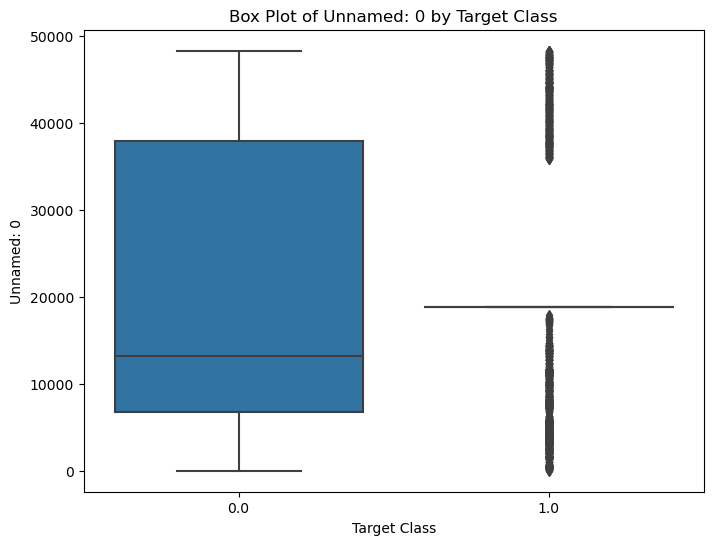

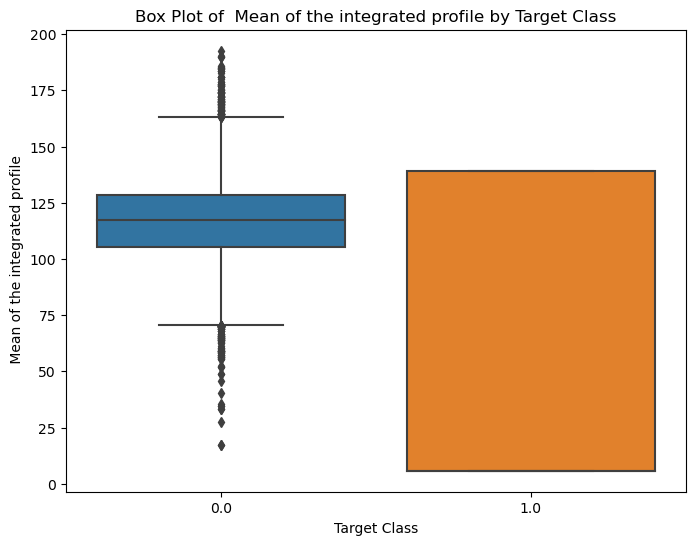

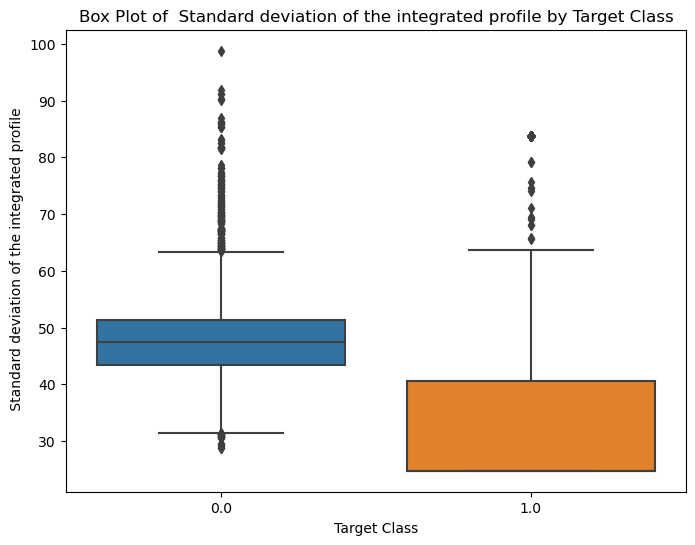

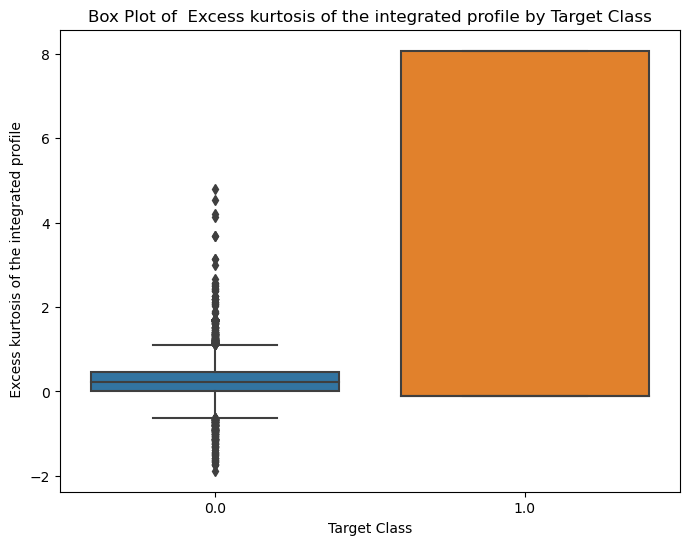

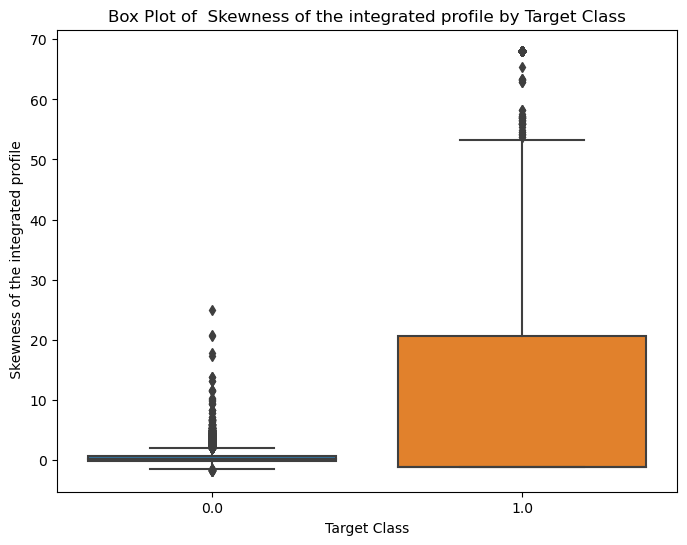

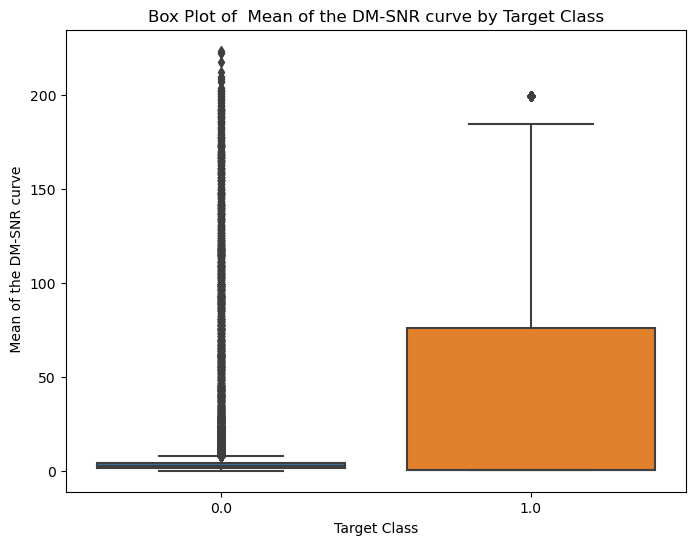

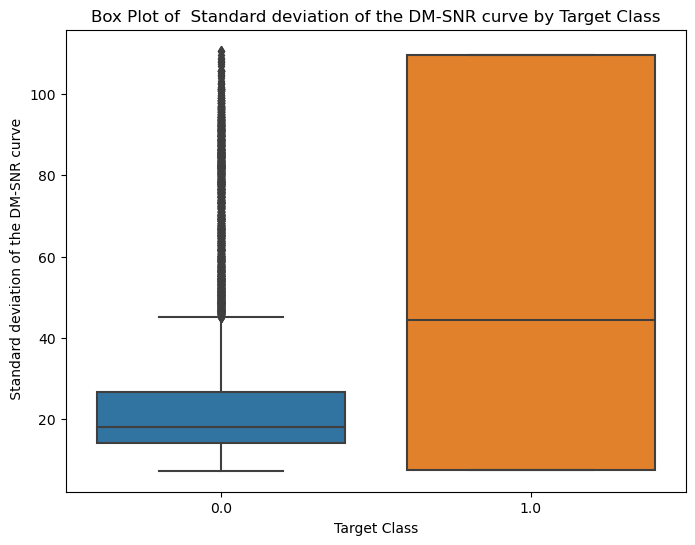

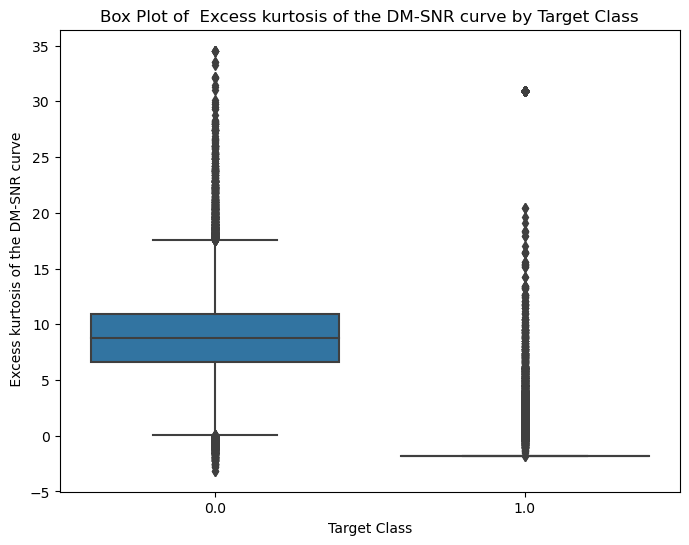

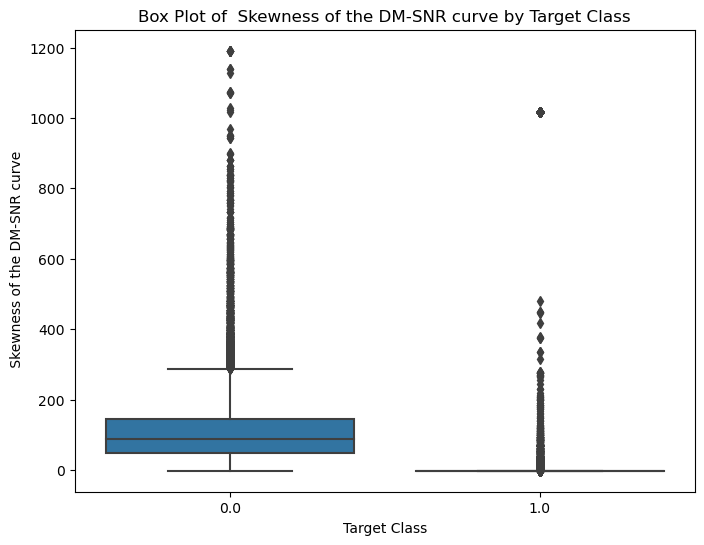

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns
for column in df_balanced_imputed.columns[:-1]:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='target_class', y=column, data=df_balanced_imputed)
  plt.title(f'Box Plot of {column} by Target Class')
  plt.xlabel('Target Class')
  plt.ylabel(column)
  plt.show()


[[-0.01446786 -0.01503117  0.01847714  0.01458876  0.01512418  0.02088503
  -0.05089651 -0.42411158]
 [-0.01465504 -0.01515359  0.01871026  0.01480764  0.01536184  0.02110961
  -0.05129446 -0.4271983 ]
 [-0.01509255 -0.01536996  0.01915304  0.01530987  0.01585292  0.02142644
  -0.05166632 -0.43048265]
 [-0.01361806 -0.01460799  0.01763487  0.01360612  0.01419623  0.02032528
  -0.05024753 -0.41941946]
 [-0.01448702 -0.01507464  0.01853364  0.01461835  0.01516238  0.02096404
  -0.05111604 -0.42517143]
 [-0.01333567 -0.01445615  0.01738101  0.01326715  0.013923    0.02023084
  -0.05012098 -0.42112207]
 [-0.01408287 -0.01485032  0.01811492  0.0141442   0.01471562  0.02067511
  -0.05068293 -0.42312242]
 [-0.0158876  -0.01580388  0.0199356   0.01625163  0.01668411  0.02188417
  -0.05229658 -0.4316907 ]]


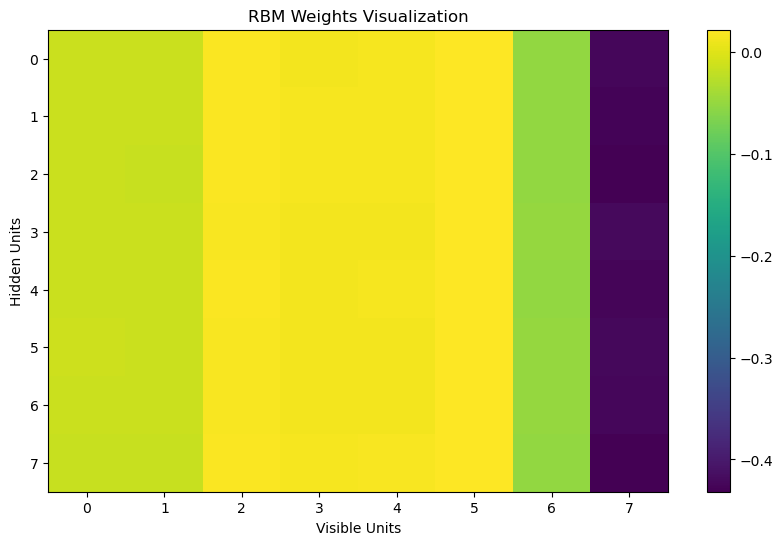

In [14]:

weights = rbm.components_
print(weights)
plt.figure(figsize=(10, 6))
plt.imshow(weights, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title("RBM Weights Visualization")
plt.xlabel("Visible Units")
plt.ylabel("Hidden Units")
plt.show()

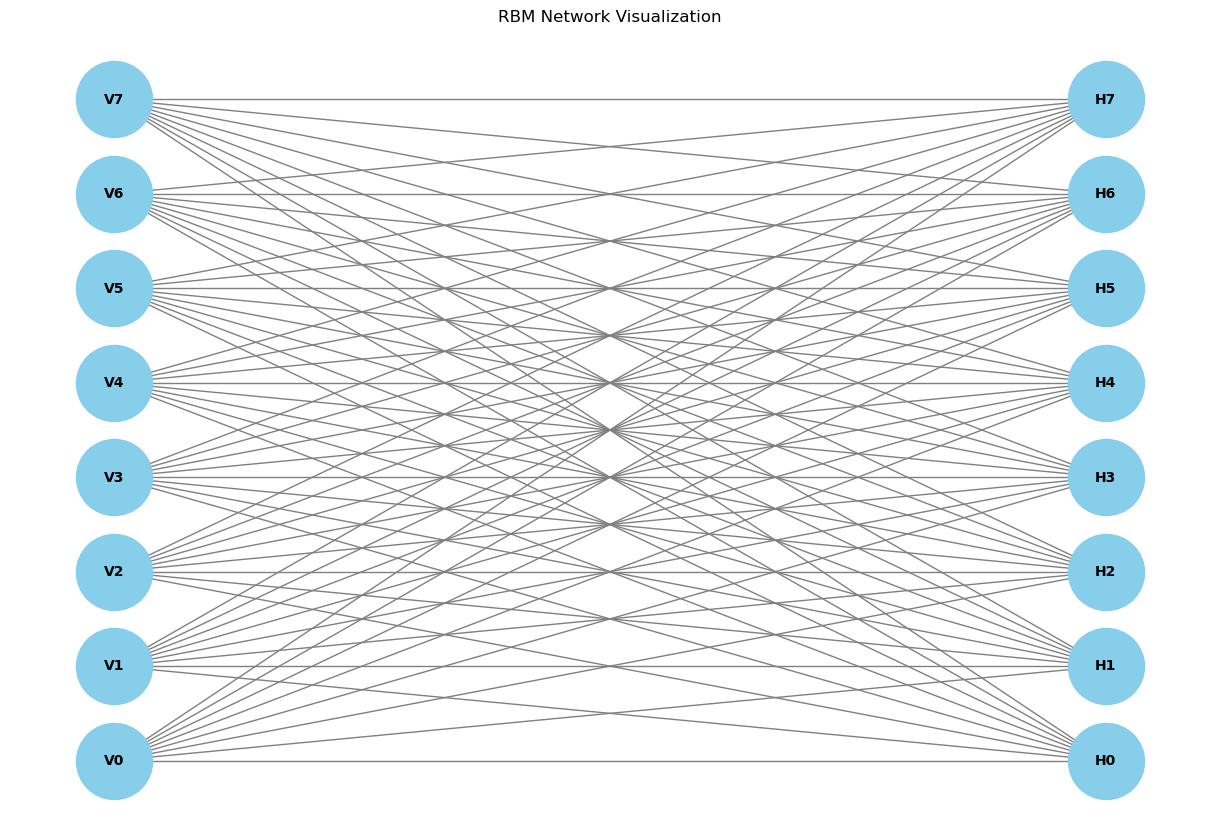

In [15]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Number of visible and hidden units
n_visible = weights.shape[1]
n_hidden = weights.shape[0]

# Add nodes for visible and hidden units
visible_nodes = [f'V{i}' for i in range(n_visible)]
hidden_nodes = [f'H{i}' for i in range(n_hidden)]
G.add_nodes_from(visible_nodes, bipartite=0)
G.add_nodes_from(hidden_nodes, bipartite=1)

# Add edges with weights between visible and hidden units
for i in range(n_hidden):
    for j in range(n_visible):
        G.add_edge(hidden_nodes[i], visible_nodes[j], weight=weights[i, j])

# Position nodes using bipartite layout
pos = {node: [0, i] for i, node in enumerate(visible_nodes)}
pos.update({node: [1, i] for i, node in enumerate(hidden_nodes)})

# Draw the network
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", edge_color="gray", font_size=10, font_weight="bold")
plt.title("RBM Network Visualization")
plt.show()


In [17]:
df_balanced_imputed.duplicated().sum()

df_balanced_imputed.shape

(45559, 10)

In [68]:


# Split the data into features and target
X = df_balanced_imputed.drop('target_class', axis=1)
y = df_balanced_imputed['target_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
clf_rep = classification_report(y_test, y_pred)
con_mtr = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", con_mtr)
print("Classification Report:\n", clf_rep)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[4580   20]
 [  51 4461]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4600
         1.0       1.00      0.99      0.99      4512

    accuracy                           0.99      9112
   macro avg       0.99      0.99      0.99      9112
weighted avg       0.99      0.99      0.99      9112

Accuracy: 0.992208077260755


In [69]:

# Split the data into features and target
X = df_balanced_imputed.drop('target_class', axis=1)
y = df_balanced_imputed['target_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression classifier
logreg = LogisticRegression()

# Train the classifier
logreg.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accur = accuracy_score(y_test, y_pred)
clasgifi_rep = classification_report(y_test, y_pred)
con_mtrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accur}')
print(f'Classification Report: \n{clasgifi_rep}')
print(f'Confusion Matrix: \n{con_mtrix}')


Accuracy: 0.8813652326602283
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      4600
         1.0       0.92      0.83      0.87      4512

    accuracy                           0.88      9112
   macro avg       0.89      0.88      0.88      9112
weighted avg       0.89      0.88      0.88      9112

Confusion Matrix: 
[[4295  305]
 [ 776 3736]]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
